In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create a dictionary with the data
data = {
    'Weight': [51, 62, 69, 64, 65, 56, 58, 57, 55],
    'Height': [167, 182, 176, 173, 172, 174, 169, 173, 170],
    'Class': ['Underweight', 'Normal', 'Normal', 'Normal', 'Normal', 'Underweight', 'Normal', 'Normal', 'Normal']
}

# Create a DataFrame
df = pd.DataFrame(data)

df

,Weight,Height,Class
0,51,167,Underweight
1,62,182,Normal
2,69,176,Normal
3,64,173,Normal
4,65,172,Normal
5,56,174,Underweight
6,58,169,Normal
7,57,173,Normal
8,55,170,Normal


In [3]:
df.shape

(9, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Weight  9 non-null      int64 
 1   Height  9 non-null      int64 
 2   Class   9 non-null      object
dtypes: int64(2), object(1)
memory usage: 348.0+ bytes


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,9.0,59.666667,5.700877,51.0,56.0,58.0,64.0,69.0
Height,9.0,172.888889,4.371626,167.0,170.0,173.0,174.0,182.0


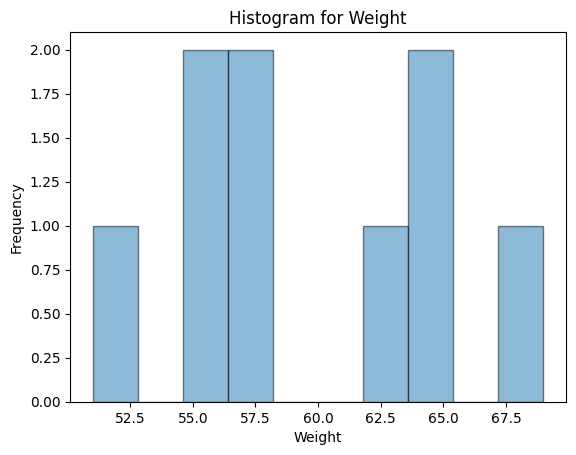

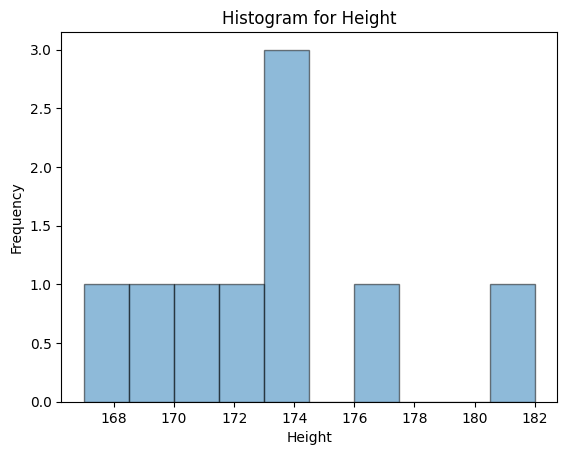

In [6]:
num_col = df.select_dtypes(include=['int', 'float']).columns
for col in num_col:
    df[col].hist(bins=10, alpha=0.5, edgecolor='black',grid=False)
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

In [8]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
np.sqrt(9)

np.float64(3.0)

In [10]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can choose a different K value

In [11]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
X_test

,Weight,Height
7,57,173
1,62,182


In [13]:
y_test

7    Normal
1    Normal
Name: Class, dtype: object

In [14]:
# Predictions
y_pred = knn.predict(X_test)
y_pred

array(['Normal', 'Normal'], dtype=object)

In [ ]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 100.00


In [16]:
# You can now use the trained model for predictions
# For example:
new_data_point = [[56, 172]]  # Replace with your own data
predicted_class = knn.predict(new_data_point)
print(f"Predicted class: {predicted_class[0]}")

Predicted class: Normal
